[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/PO_II/blob/main/3_Otimização_Redes/CaminhoMin/Dijkistra_nx.ipynb)

## **Pesquisa Operacional II**

**Prof. Diogo Ferreira de Lima Silva (TEP-UFF)**

Monitores: 
- 2022 - Rodrigo Celso de Lima Porto 

In [ ]:
# Para rodar o código no Google Colab, instale as bibliotecas a seguir:

!pip install -q pyomo
!pip install glpk

In [76]:
import networkx as nx
import matplotlib.pyplot as plt
from pyomo.environ import *

# PROBLEMA DO CAMINHO MÍNIMO (Mais Curto)


O Problema do Caminho Mínimo (<i>Shortest Path Problem</i>) consiste em encontrar o caminho mais curto existente entre dois vertices de um grafo.

- Partimos de um vértice origem $s$ e chegamos em uma vértice destino $t$. 

- O nosso grafo é **ponderado** e cada aresta possui um custo $w_{ij}$ associado (exemplo: custo de viajar do vértice $i$ para o vértice $j$).

- - Se o grafo for não ponderado, consideramos peso 1 em todos os arcos. 


---
# INSTÂNCIA DO PROBLEMA
---

Fonte: LACHTERMACHER, G. Pesquisa Operacional na tomada de decisões, 5ª edição.

A fábrica de artigos de decoração LCL Adornos & Tecidos, localizada em Lambari, Minas Gerais, deve entregar grande quantidade de peças na cidade de Baependi, no mesmo estado. A empresa quer saber qual caminho seu caminhão de entregas deve fazer para minimizar a distância total percorrida. A Figura 5.27 mostra o mapa rodoviário da região do estado em que se situam as duas cidades, e a Figura 5.28 mostra o mapa esquemático e as distâncias entre as cidades na forma de rede.

<img src="LACHTERMACHER_5.27.png">

________________________________________________
________________________________________________

<img src="LACHTERMACHER_5.28.png">


---
---
# RESOLVENDO COM NETWORKX
---
---

<p align=justify>
&emsp; A biblioteca NetworkX conta com as funções <a href='https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#networkx.algorithms.shortest_paths.generic.shortest_path'><code>shortest_path()</code></a> e <a href='https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html'><code>shortest_path_length</code></a> para executar o algoritmo de Dijkistra e encontrar o caminho mínimo dentro de um grafo e o valor do seu comprimento, respectivamente. Para isso, é necessário construir o grafo do problema antes de executar o algoritmo.
</p>

In [67]:
# Instanciando um grafo direcionado
G = nx.DiGraph()

# Criando os nós a partir de uma lista
G.add_nodes_from([
    (1, {'cidade': 'Lambari'}),
    (2, {'cidade': 'Três Corações'}),
    (3, {'cidade': 'São Lorenço'}),
    (4, {'cidade': 'S. Thomé das Letras'}),
    (5, {'cidade': 'Caxambu'}),
    (6, {'cidade': 'Baependi'})
])

# Criando as arestas a partir de uma lista
# Foi definido um atributo 'distância' para cada aresta
G.add_edges_from([
    (1,  2, {'distância': 41}),
    (1,  3, {'distância':  44}),
    (1,  5, {'distância':  50}),
    (2,  4, {'distância':  37}),
    (3,  5, {'distância':  27}),
    (4,  6, {'distância':  45}),
    (5,  6, {'distância':  4})
])

# Calcula o Caminho Mínimo e retorna uma lista de nós
nos_cm = nx.shortest_path(
    G,
    source= 1,
    target= 6,
    weight= 'distância',
    method= 'dijkstra'
    )

# Calcula o comprimento do Caminho Mínimo
comprimento_cm = nx.shortest_path_length(
    G,
    source= 1,
    target= 6,
    weight= 'distância',
    method= 'dijkstra'
    )

In [68]:
print(f'O caminho encontrado foi {nos_cm}')
print(f'O tamanho do caminho é {comprimento_cm}')

O caminho encontrado foi [1, 5, 6]
O tamanho do caminho é 54


---
## Desenhando o grafo
---

Vamos desenhar nosso grafo. 


Podemos acessar mais opções para o gráfico. Por exemplo, podemoscriar e guardar as posições dos nós em uma variável. 

Para isso foi utilizado a função <a href='https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html'><code>spring_layout()</code></a>.

Logo depois, seguimos para a aplicação da função <a href='https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx'><code>draw_networkx()</code></a> para desenhar os grafos.

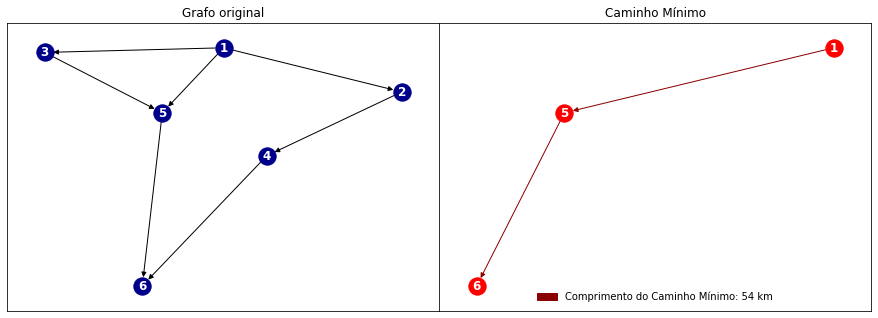

In [69]:
# Define o layout dos nós do grafo G para exibição
layout = nx.spring_layout(G)

# Desenhando o grafo original
nx.draw_networkx(
    G,                                # Grafo original
    ax=          plt.axes([0,0,1,1]), # Define o eixo de exibição
    pos=         layout,              # Define o layout dos nós         
    with_labels= True,                # Os nós terão rótulos para exibir os seus nomes
    node_color=  'darkblue',          # Define a cor dos nós como azul escuro
    node_size=   300,                 # Define o tamanho dos nós
    node_shape=  'o',                 # Define o formato dos nós como círculo
    font_weight= 'bold',              # Coloca negrito no texto dos nomes dos nós
    font_color=  'white'              # Define a cor do texto dos nomes como branco
    )
plt.title('Grafo original') # Define o título do 1º grafo

# Criando um lista das arestas para posterior exibição
arestas_cm = [(nos_cm[i], nos_cm[i+1]) for i in range (len(nos_cm)-1)]

# Desenhando o Caminho Mínimo
nx.draw_networkx(
    G,                                # Grafo original
    nodelist=    nos_cm,              # Exibe apenas os nós armazenados em nos_cm 
    edgelist=    arestas_cm,          # Exibe apenas as arestas armazenadas em arestas_cm
    ax=          plt.axes([1,0,1,1]), # Define o eixo de exibição
    pos=         layout,              # Define o layout dos nós         
    with_labels= True,                # Os nós terão rótulos para exibir os seus nomes
    node_color=  'red',               # Define a cor dos nós como vermelho
    edge_color=  'darkred',           # Define a cor das arestas como vermelho escuro
    node_size=   300,                 # Define o tamanho dos nós
    node_shape=  'o',                 # Define o formato dos nós como círculo
    font_weight= 'bold',              # Coloca negrito no texto dos nomes dos nós
    font_color=  'white'              # Define a cor do texto dos nomes como branco
    )
plt.title('Caminho Mínimo') # Define o título do 2º grafo
plt.legend(
    labels=     [f"Comprimento do Caminho Mínimo: {comprimento_cm} km"],
    loc=        'lower center',
    framealpha= 0
    )

---
# EXERCÍCIO DE FIXAÇÃO
---

Fonte: TAHA, Hamdy A. <b>Operations Research: An Introduction</b>. 10ª edição. Exercício 6-14, pág. 292.

A figura a seguir fornece a rede de comunicação entre duas estações, 1 e 7. A probabilidade de um link na rede operar sem falhas é mostrada em cada arco. As mensagens são enviadas da estação 1 para a estação 7, e o objetivo é determinar a rota que maximiza a probabilidade de uma transmissão bem-sucedida. Formule a situação como um modelo de Caminho Mínimo e determine a solução ótima.




<img src="CaminhoMin2.png">




### (a) Resolva utilizando NetworkX

In [70]:
import networkx as nx



### (b) Apresente os grafos com Matplotlib

In [71]:
import matplotlib.pyplot as plt



# Modelando o problema com Otimização Linear


Considerando novamento o problema da LCL Adornos & Tecidos. Vamos definir a modelagem do problema por meio de otimização linear.

In [72]:
from pyomo.environ import *


$
\min \quad f(\mathbf{x}) = \sum_{i=1}^{n} \sum_{j \in S(i)} c_{ij} x_{ij} \\
\text{sujeito a:} \\
\sum_{j \in S(1)} x_{1j} = 1 \\
\sum_{i \in P(n)} x_{i,n} = 1 \\
\sum_{i \in P(j)} x_{ij} = \sum_{k \in S(j)} x_{jk}, \quad j = 2, \ldots, n-1 \\
x_{ij} > 0, \quad i = 1, \ldots, n \text{ and } j = 1, \ldots, n
$

Inicialmente, vamos criar novamento o nosso grafo

In [73]:
# Instanciando um grafo direcionado
G = nx.DiGraph()

# Criando os nós a partir de uma lista
G.add_nodes_from([
    (1, {'cidade': 'Lambari'}),
    (2, {'cidade': 'Três Corações'}),
    (3, {'cidade': 'São Lorenço'}),
    (4, {'cidade': 'S. Thomé das Letras'}),
    (5, {'cidade': 'Caxambu'}),
    (6, {'cidade': 'Baependi'})
])

# Criando as arestas a partir de uma lista
# Foi definido um atributo 'distância' para cada aresta
G.add_edges_from([
    (1,  2, {'distância': 41}),
    (1,  3, {'distância':  44}),
    (1,  5, {'distância':  50}),
    (2,  4, {'distância':  37}),
    (3,  5, {'distância':  27}),
    (4,  6, {'distância':  45}),
    (5,  6, {'distância':  4})
])

Vamos buscar algumas informações no nosso grafo.

In [74]:
n = len(G.nodes()) # n será o número de nós, além do rótulo associado ao último nó.

S = {i: list(G.successors(i)) for i in range(1, n+1)} # 
P = {i: list(G.predecessors(i)) for i in range(1, n+1)} #

# Peso associado às arestas serão também armazenados em um dicionário
c = {(i, j): G.get_edge_data(i, j).get('distância', 0) for i in range(1, n+1) for j in S.get(i, [])}

In [75]:
# Cria o modelo
M = ConcreteModel() 

# Definindo as variáveis de decisão a partir do dicionário de pesos
M.x = Var(c.keys(), domain=NonNegativeReals)

# Define objective function
M.obj = Objective(expr=sum(M.x[i, j] * c[i, j] for i, j in c), sense=minimize)

# Define constraints
M.origem = Constraint(expr=sum(M.x[1, j] for j in S[1]) == 1) # Saímos do nó 1 e chegamos a alguém.
M.destino = Constraint(expr=sum(M.x[i, n] for i in P[n]) == 1) # Chegamos ao nó n a partir de alguém.
M.fluxo = ConstraintList()
for j in range(2, n):
    if P[j] and S[j]:
        M.fluxo.add(sum(M.x[i, j] for i in P[j]) == sum(M.x[j, k] for k in S[j]))

# Resolva o modelo
SolverFactory('glpk').solve(M)

# Imprima a solução
print('Optimal path:', [1] + [j for j in S[1] if M.x[1, j].value > 0] + [j for i in range(2, n) for j in S.get(i, []) if M.x[i, j].value > 0])
print('Total distance:', M.obj()) 

Optimal path: [1, 5, 6]
Total distance: 54.0
